# Import Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Exploratory Data Analysis

## 1.1 Introduction

This initial phase handles loading the car price training data and performing basic checks to understand its fundamental characteristics before deeper analysis or modeling.

**Key Actions and Their Purposes:**

1.  **Action:** Loading Data (Reading `train.csv` into a pandas DataFrame).
    *   **Purpose:** To bring the dataset into the Python environment so it can be manipulated and analyzed.

2.  **Action:** Getting Overview (Using `info()`).
    *   **Purpose:** To quickly understand the dataset's dimensions (rows, columns), identify column data types, and get an initial count of non-missing values per column to spot potential missing data issues early.

3.  **Action:** Identifying Feature Types (Separating numerical and categorical columns).
    *   **Purpose:** To classify features based on their data type, as numerical and categorical features require different preprocessing techniques (e.g., scaling vs. encoding).

4.  **Action:** Summarizing Numerical Data (Using `describe()`).
    *   **Purpose:** To understand the distribution, central tendency (mean), spread (standard deviation), and range (min/max) of numerical features, helping to identify potential skewness or outliers.

5.  **Action:** Previewing Data (Using `head()`).
    *   **Purpose:** To get a concrete look at the first few data entries, verifying that the data loaded correctly and understanding the format/values within different columns.

6.  **Action:** Analyzing Target Variable (Visualizing 'Price' distribution).
    *   **Purpose:** To specifically examine the distribution of the variable we want to predict ('Price'), checking for characteristics like skewness or outliers that might impact linear regression model performance and may require transformations.

In [3]:
# 1. Load Dataset
df_train = pd.read_csv('/kaggle/input/car-price-dataset/train.csv')

# 2. Check Information of the Data Structure and Size
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   object 
 12  Max Power           1582 non-null   object 
 13  Max Torque          1582 non-null   object 
 14  Drivetrain          1536 non-null   object 
 15  Length              1595 non-null   float64
 16  Width 

In [4]:
# 3. Feature Type Checking
numerical_features = df_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = df_train.select_dtypes(include='object').columns.tolist()
print("\nNumerical Features: ", numerical_features)
print("Categorical Features: ", categorical_features)


Numerical Features:  ['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
Categorical Features:  ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain']


In [5]:
# 4. Descriptive Statistics
df_train.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.647000e+03,1647.000000,1.647000e+03,1595.00000,1595.000000,1595.000000,1595.000000,1557.000000
mean,1.696655e+06,2016.419551,5.420636e+04,4281.47837,1767.580564,1592.423824,5.310345,52.154656
std,2.360649e+06,3.370327,5.849584e+04,448.16458,137.053924,136.360967,0.816002,15.405199
min,4.900000e+04,1988.000000,0.000000e+00,3099.00000,1475.000000,1165.000000,2.000000,15.000000
25%,4.775000e+05,2014.000000,2.900000e+04,3985.00000,1695.000000,1485.000000,5.000000,40.000000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.00000,1775.000000,1550.000000,5.000000,50.000000
75%,1.950000e+06,2019.000000,7.200000e+04,4630.00000,1835.000000,1675.000000,5.000000,60.000000
max,2.750000e+07,2022.000000,2.000000e+06,5569.00000,2220.000000,1995.000000,8.000000,105.000000


In [6]:
# 5. Quick Review
df_train.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [7]:
def visualize_distributions(df, features):
    """
    Visualize distributions of numerical features using histograms and box plots.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data
    features (list): List of numerical feature names to visualize
    """
    num_features = len(features)
    
    # Ensure subplots work correctly for a single feature
    fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(15, 4 * num_features))
    
    if num_features == 1:
        axes = [axes]  # Ensure axes is always iterable
    
    for i, feature in enumerate(features):
        # Histogram
        axes[i][0].hist(df[feature].dropna(), bins=30, edgecolor='black')
        axes[i][0].set_title(f'Histogram of {feature}')
        axes[i][0].set_xlabel(feature)
        axes[i][0].set_ylabel('Frequency')
        
        # Box plot with styling (matching your uploaded image)
        sns.boxplot(x=df[feature], ax=axes[i][1], color="white",
                    boxprops=dict(edgecolor="blue"),
                    whiskerprops=dict(color="blue"),
                    capprops=dict(color="blue"),
                    medianprops=dict(color="blue"),
                    flierprops=dict(marker='o', markersize=6, markerfacecolor='white', markeredgecolor='blue', alpha=0.6))  # Outliers in blue
        axes[i][1].set_title(f'Box Plot of {feature}')
        axes[i][1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

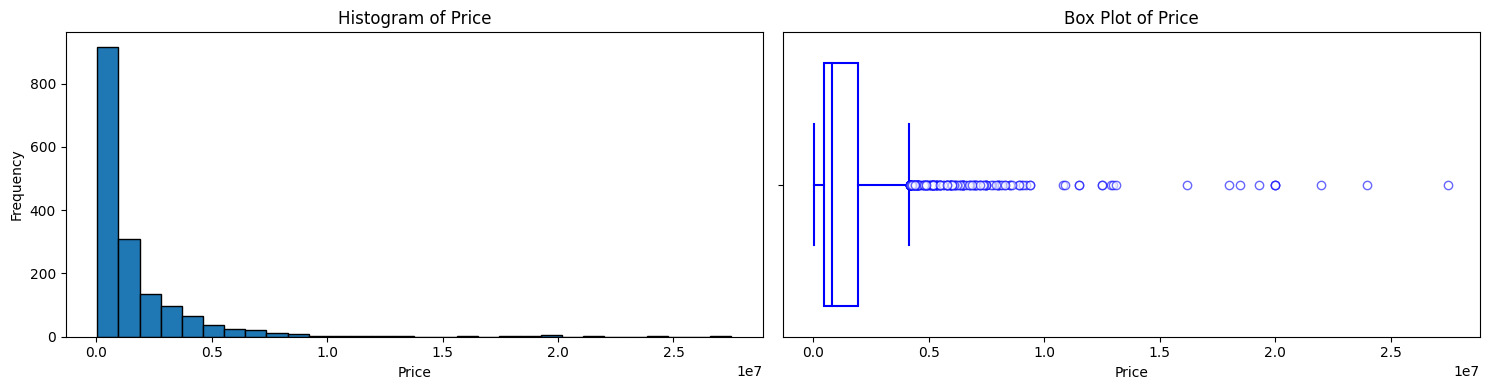

In [8]:
# 6. 'Price' Distribution Analysis:
visualize_distributions(df_train, ["Price"])

## 1.2 Categorical Features Encoding

In this section, we are going to convert categorical features into numerical features.

1.  **List Categorical Features:**
    *   **Action:** Identify all columns containing text/object data.
    *   **Purpose:** To isolate features that need non-numerical analysis and specific preprocessing (like encoding).

2.  **Analyze Value Frequencies in Categorical Features:**
    *   **Action:** For each categorical column, count how often each unique value (including missing values/`NaN`) appears and calculate its percentage.
    *   **Purpose:** To understand the distribution of categories within each feature, check for potential data quality issues or imbalances, and see if missing values exist within these specific columns. We also want to seek for the cardinality of each categorical feature to brainstorm an approriate encode strategy.

3.  **Summarize Missing Values Across Entire Dataset:**
    *   **Action:** Calculate the total count and percentage of missing values for *every* column (numerical and categorical).
    *   **Purpose:** To get a comprehensive overview of data completeness and identify all columns requiring missing data handling (imputation).

In [9]:
# 1. List Categorical Features
object_columns = df_train.select_dtypes(include='object').columns.tolist()
print(object_columns)

['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain']


In [10]:
# 2. Analyze Value Frequencies in Categorical Features
for col in object_columns:
    print(f"\n----------------- Feature: {col} -----------------")

    # Calculate value counts
    # dropna=False includes counts of NaN (missing values) if they exist
    counts = df_train[col].value_counts(dropna=False)

    # Calculate percentages (optional, but often useful)
    percentages = df_train[col].value_counts(normalize=True, dropna=False) * 100

    # Combine counts and percentages into a small DataFrame for nice printing
    summary_df = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})

    print(summary_df)

    # Optional: Add a check for high cardinality
    unique_count = df_train[col].nunique(dropna=False) # Includes NaN as a unique value if present
    print(f"Total Unique Values (including NaN if any): {unique_count}")
    if unique_count > 50: # Example threshold for "high cardinality"
         print(f"Note: '{col}' has high cardinality ({unique_count} unique values).")


----------------- Feature: Make -----------------
               Count  Percentage (%)
Make                                
Maruti Suzuki    349           21.19
Hyundai          288           17.49
Mercedes-Benz    141            8.56
Honda            119            7.23
Toyota           113            6.86
Audi             109            6.62
Mahindra          94            5.71
BMW               91            5.53
Tata              49            2.98
Ford              43            2.61
Renault           38            2.31
Volkswagen        34            2.06
Skoda             32            1.94
Land Rover        24            1.46
Jaguar            17            1.03
Jeep              14            0.85
Volvo             13            0.79
Kia               12            0.73
Nissan            10            0.61
MG                10            0.61
MINI               9            0.55
Porsche            9            0.55
Datsun             7            0.43
Chevrolet          5    

In [11]:
# 3. Summarize Missing Values Across Entire Dataset:

# Get the count of missing values for EACH column in the entire DataFrame
missing_counts_all = df_train.isnull().sum()

# Calculate the percentage of missing values for EACH column
total_rows_all = len(df_train) # Total rows in the DataFrame
missing_percentages_all = (missing_counts_all / total_rows_all) * 100

# Combine into a single DataFrame for display
missing_summary_all = pd.DataFrame({
    'Missing Count': missing_counts_all,
    'Missing Percentage (%)': missing_percentages_all
})

# Sort the summary table to show columns with most missing values first
missing_summary_all = missing_summary_all.sort_values(by='Missing Count', ascending=False)

# Filter to show only columns that actually have missing values
missing_summary_filtered_all = missing_summary_all[missing_summary_all['Missing Count'] > 0]

# Print the filtered summary
if missing_summary_filtered_all.empty:
    print("No missing values found in any column.")
else:
    print("(Sorted by count, showing only columns with missing data)")
    print(missing_summary_filtered_all)

(Sorted by count, showing only columns with missing data)
                    Missing Count  Missing Percentage (%)
Drivetrain                    111                6.739526
Fuel Tank Capacity             90                5.464481
Max Torque                     65                3.946570
Max Power                      65                3.946570
Engine                         65                3.946570
Seating Capacity               52                3.157256
Height                         52                3.157256
Width                          52                3.157256
Length                         52                3.157256


Based on the initial analysis (value counts, cardinality), the categorical features can be grouped into distinct types, each requiring a specific preprocessing approach:

1.  **Ordinal Features:**
    *   **Feature(s):** `Owner`
    *   **Nature:** These categories have an inherent order (e.g., First Owner < Second Owner < Third Owner).
    *   **Action:** Apply **Ordinal Encoding**. Map the categories to numerical values that respect their order (e.g., First=1, Second=2, Third=3).
    *   **Benefit:** Captures the ordered relationship directly and avoids introducing unnecessary dimensionality or potential multicollinearity associated with one-hot encoding for ordinal data.

2.  **Features Requiring Parsing (Embedded Numerical Data):**
    *   **Feature(s):** `Engine`, `Max Power`, `Max Torque`
    *   **Nature:** These features are stored as strings but contain valuable numerical information often accompanied by units (e.g., "1197 CC", "88.7 bhp", "113 Nm @ 4400 rpm").
    *   **Action:** **Extract Numerical Values**. Implement parsing logic (e.g., using regular expressions or string splitting) to isolate the primary numerical component from each string. Ensure units are handled consistently (e.g., convert all power to bhp or torque to Nm if variations exist).

3.  **Nominal Features (No Inherent Order):**
    *   **Feature(s):** `Make`, `Model`, `Fuel Type`, `Transmission`, `Location`, `Color`, `Seller Type`, `Drivetrain`
    *   **Nature:** These categories have no intrinsic order. The handling strategy depends heavily on the **cardinality** (number of unique categories).
    *   **Actions based on Cardinality:**
        *   **Low Cardinality Features** (e.g., `Fuel Type`, `Transmission`, `Seller Type`, possibly `Drivetrain`):
            *   *(Optional but Recommended):* **Group Rare Categories:** Combine infrequent categories into a single 'Other' category to reduce noise and dimensionality.
            *   Apply **One-Hot Encoding:** Create binary (0/1) columns for each category.
            *   **Prevent Multicollinearity:** Drop one of the newly created binary columns for each original feature (avoids the Dummy Variable Trap).
        *   **Moderate Cardinality Features** (e.g., potentially `Location`, `Color`):
            *   Consider **Target Encoding** (Mean Encoding). Replace each category with the average target value (`Price`) for that category.
            *   **Caution:** Implement carefully (e.g., using cross-validation or adding smoothing) to prevent target leakage and overfitting.
        *   **High Cardinality Features** (e.g., `Make`, `Model`):
            *   **Option 1: Target Encoding:** Same as moderate cardinality, but the risk of overfitting is higher. Robust implementation is crucial.
            *   **Option 2: Grouping + One-Hot Encoding:** Apply more aggressive grouping (based on frequency, domain knowledge, or even target value similarity) to significantly reduce the number of categories, then apply one-hot encoding (potentially with dropping one column).
            *   *(Alternative Consideration):* Feature Hashing could be explored if dimensionality remains a major concern, though it can reduce interpretability.

In [12]:
df_processed = df_train.copy()

# --- Impute Missing Categorical: Drivetrain ---

# Using mode imputation
if df_processed['Drivetrain'].isnull().sum() > 0:
    drivetrain_mode = df_processed['Drivetrain'].mode()[0]
    df_processed['Drivetrain'].fillna(drivetrain_mode, inplace=True)
    print(f"Filled NaNs in Drivetrain with mode: '{drivetrain_mode}'")
    print(f"NaNs remaining in Drivetrain: {df_processed['Drivetrain'].isnull().sum()}")
else:
    print("No missing values found in Drivetrain.")

Filled NaNs in Drivetrain with mode: 'FWD'
NaNs remaining in Drivetrain: 0


In [13]:
# 1. Handle Ordinal Features: Owner

# Define the desired order
owner_map = {
    'UnRegistered Car': 0,
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth': 4,
    '4 or More': 5
}

# Check if all values in the column exist in the map keys
unique_owners = df_processed['Owner'].unique()
missing_keys = [owner for owner in unique_owners if owner not in owner_map and pd.notna(owner)]
if missing_keys:
    print(f"Warning: The following Owner values are not in the mapping: {missing_keys}. They will become NaN.")

df_processed['Owner'] = df_processed['Owner'].map(owner_map)
print(f"Owner column encoded. Sample values:\n{df_processed['Owner'].value_counts(dropna=False)}")
print(f"NaNs in Owner after mapping: {df_processed['Owner'].isnull().sum()}")
print(f"Owner dtype: {df_processed['Owner'].dtype}")

Owner column encoded. Sample values:
Owner
1    1300
2     288
3      38
0      17
4       3
5       1
Name: count, dtype: int64
NaNs in Owner after mapping: 0
Owner dtype: int64


In [14]:
# 2. Handle Parsing-Needed Features: Engine, Max Power, Max Torque

def extract_numerical(text):
    """Extracts the first floating point number from a string."""
    if isinstance(text, (int, float)):
        return float(text)
    if isinstance(text, str):
        # Regex to find the first sequence of digits, possibly with a decimal point
        match = re.search(r'(\d+\.?\d*)', text)
        if match:
            try:
                return float(match.group(1))
            except ValueError:
                return np.nan # Handle cases where extraction fails unexpectedly
        else:
            return np.nan # Return NaN if no number is found
    return np.nan # Handle None or other types

parsing_cols = ['Engine', 'Max Power', 'Max Torque']

for col in parsing_cols:
    print(f"Parsing column: {col}")
    # Apply the extraction function
    df_processed[col] = df_processed[col].apply(extract_numerical)
    # Ensure the column is numeric type (float to handle NaNs and decimals)
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
    print(f" -> {col} dtype after parsing: {df_processed[col].dtype}")
    print(f" -> NaNs in {col} after parsing: {df_processed[col].isnull().sum()}")

Parsing column: Engine
 -> Engine dtype after parsing: float64
 -> NaNs in Engine after parsing: 65
Parsing column: Max Power
 -> Max Power dtype after parsing: float64
 -> NaNs in Max Power after parsing: 65
Parsing column: Max Torque
 -> Max Torque dtype after parsing: float64
 -> NaNs in Max Torque after parsing: 65


In [15]:
# 3. Handle Low/Moderate Cardinality - Nominal Features

# Optional: Group rare categories in Fuel Type
print("Grouping rare ===Fuel=== Type categories...")
fuel_counts = df_processed['Fuel Type'].value_counts(normalize=True)
# Define a threshold (e.g., less than 1% frequency)
threshold = 0.01
rare_fuels = fuel_counts[fuel_counts < threshold].index.tolist()
if rare_fuels:
    print(f"Grouping these fuel types into 'Other_Fuel': {rare_fuels}")
    df_processed['Fuel Type'] = df_processed['Fuel Type'].replace(rare_fuels, 'Other_Fuel')
    print(f"New Fuel Type value counts:\n{df_processed['Fuel Type'].value_counts()}")
else:
    print("No fuel types met the rarity threshold for grouping.")

# Optional: Group rare categories in Color
print("\nGrouping rare ===Color=== categories...")
color_counts = df_processed['Color'].value_counts(normalize=True)
# Define a threshold (e.g., less than 1.5% frequency)
threshold_color = 0.05
rare_colors = color_counts[color_counts < threshold_color].index.tolist()
if rare_colors:
    print(f"Grouping these colors into 'Other_Color': {rare_colors}")
    df_processed['Color'] = df_processed['Color'].replace(rare_colors, 'Other_Color')
    print(f"New Color value counts:\n{df_processed['Color'].value_counts()}")
else:
    print("No colors met the rarity threshold for grouping.")

# Columns to One-Hot Encode (including Drivetrain which is now imputed)
ohe_cols = ['Transmission', 'Seller Type', 'Drivetrain', 'Fuel Type', 'Color']
print(f"\nApplying One-Hot Encoding (drop_first=True) to: {ohe_cols}")

original_cols = df_processed.columns.tolist()
df_processed = pd.get_dummies(df_processed, columns=ohe_cols, drop_first=True, dtype=int)
new_ohe_cols = [col for col in df_processed.columns if col not in original_cols]

print(f" ---> Created {len(new_ohe_cols)} new OHE columns.")

Grouping rare ===Fuel=== Type categories...
Grouping these fuel types into 'Other_Fuel': ['Electric', 'LPG', 'Hybrid', 'CNG + CNG', 'Petrol + LPG']
New Fuel Type value counts:
Fuel Type
Diesel        839
Petrol        756
CNG            38
Other_Fuel     14
Name: count, dtype: int64

Grouping rare ===Color=== categories...
Grouping these colors into 'Other_Color': ['Brown', 'Maroon', 'Gold', 'Bronze', 'Green', 'Orange', 'Others', 'Beige', 'Yellow', 'Purple', 'Pink']
New Color value counts:
Color
White          647
Silver         222
Other_Color    203
Grey           176
Blue           144
Black          135
Red            120
Name: count, dtype: int64

Applying One-Hot Encoding (drop_first=True) to: ['Transmission', 'Seller Type', 'Drivetrain', 'Fuel Type', 'Color']
 ---> Created 14 new OHE columns.


In [16]:
# Bonus: Create log1p_Price

# Assume 'df_processed' is ready
target = 'log1p_Price'
# Ensure target exists (or create it as shown in the previous example)
if target not in df_processed.columns:
    if 'Price' in df_processed.columns:
        print(f"Target '{target}' not found, creating it from 'Price'.")
        df_processed[target] = np.log1p(df_processed['Price'])
    else:
        print(f"Error: Cannot proceed. Target column '{target}' or 'Price' not found.")
        exit() # Or handle error

Target 'log1p_Price' not found, creating it from 'Price'.


In [17]:
# 4. Handle High Cardinality - Nominal Features

def apply_target_encoding(df_input, cols_to_encode, target_col, weight=10, drop_original=False):
    """
    Applies target encoding with smoothing to specified columns using only pandas/numpy.
    Adds new columns with '_TargetEncoded' suffix. Optionally drops original columns.

    Args:
        df_input (pd.DataFrame): The input DataFrame.
        cols_to_encode (list): A list of column names to target encode.
        target_col (str): The name of the target variable column (e.g., 'log1p_Price' or 'Price').
        weight (int, optional): Smoothing parameter. Higher values mean more smoothing. Defaults to 10.
        drop_original (bool, optional): If True, drops the original categorical columns
                                       after encoding. Defaults to False.

    Returns:
        tuple:
            pd.DataFrame: A new DataFrame with target encoded columns added/updated.
            dict: A dictionary storing the mappings learned for each column
                  (map of category -> smoothed_mean, and the global_mean).
    """
    df = df_input.copy() # Work on a copy
    learned_maps = {}
    print(f"--- Applying Target Encoding (Smoothing Weight: {weight}, Drop Original: {drop_original}) ---")

    # --- 1. Ensure target column is numeric and calculate global mean ---
    if target_col not in df.columns:
        print(f"Error: Target column '{target_col}' not found.")
        return df_input, {}
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"Error: Target column '{target_col}' must be numeric.")
        return df_input, {}

    global_mean = df[target_col].mean()
    print(f"Global mean of '{target_col}': {global_mean:.4f}")

    # --- 2. Iterate through columns to encode ---
    for col in cols_to_encode:
        if col not in df.columns:
            print(f" -> Warning: Column '{col}' not found. Skipping.")
            continue

        print(f"Processing column: '{col}'")
        new_col_name = f"{col}_TargetEncoded"

        # --- 3. Calculate Group Aggregates ---
        temp_col_filled = df[col].fillna("NaN_Placeholder_TE")
        agg = df.groupby(temp_col_filled)[target_col].agg(['mean', 'count'])

        # --- 4. Calculate Smoothed Means ---
        category_means = agg['mean']
        category_counts = agg['count']
        smoothed_means = (category_means * category_counts + global_mean * weight) / (category_counts + weight)

        # --- 5. Prepare Mapping Dictionary ---
        mapping_dict = smoothed_means.to_dict()
        if "NaN_Placeholder_TE" in mapping_dict:
             _ = mapping_dict.pop("NaN_Placeholder_TE") # Remove placeholder
             # We still use global_mean for actual NaNs later

        learned_maps[col] = {'map': mapping_dict, 'global_mean': global_mean}

        # --- 6. Map Values and Handle Missing/Unseen ---
        df[new_col_name] = df[col].map(mapping_dict)
        nan_count_after_map = df[new_col_name].isnull().sum()
        if nan_count_after_map > 0:
            print(f"   -> Filling {nan_count_after_map} NaNs in '{new_col_name}' with global mean {global_mean:.4f}.")
            df[new_col_name].fillna(global_mean, inplace=True)
        print(f" -> Created '{new_col_name}'.")

        # --- 7. Optionally Drop Original Column ---
        if drop_original:
            df.drop(columns=[col], inplace=True)
            print(f" -> Dropped original column '{col}'.")

    print("--- Target Encoding Application Complete ---")
    return df, learned_maps

# --- Function to Apply Learned Maps to New Data (with drop_original option) ---

def transform_with_target_encoding_maps(df_input, learned_maps, drop_original=False):
    """
    Applies pre-learned target encoding mappings to a new DataFrame.
    Optionally drops original columns.

    Args:
        df_input (pd.DataFrame): The new DataFrame to transform (e.g., test set).
        learned_maps (dict): The dictionary returned by apply_target_encoding.
        drop_original (bool, optional): If True, drops the original categorical columns
                                       after encoding. Defaults to False.

    Returns:
        pd.DataFrame: A new DataFrame with target encoded columns added/updated.
    """
    df = df_input.copy()
    print(f"--- Transforming using Learned Target Encoding Maps (Drop Original: {drop_original}) ---")

    if not learned_maps:
         print("Warning: No learned maps provided. Returning original DataFrame.")
         return df

    for col, map_info in learned_maps.items():
        if col not in df.columns:
            print(f" -> Warning: Column '{col}' not found in input data. Skipping transformation.")
            continue

        print(f"Transforming column: '{col}'")
        new_col_name = f"{col}_TargetEncoded"
        mapping_dict = map_info.get('map', {})
        global_mean = map_info.get('global_mean', np.nan)

        if np.isnan(global_mean):
             print(f" -> Warning: Stored global mean for '{col}' is invalid. Skipping.")
             continue

        # Apply known mapping
        df[new_col_name] = df[col].map(mapping_dict)

        # Fill NaNs (unseen or original) with stored global mean
        nan_count = df[new_col_name].isnull().sum()
        if nan_count > 0:
            print(f"   -> Filling {nan_count} NaNs in '{new_col_name}' with stored global mean {global_mean:.4f}.")
            df[new_col_name].fillna(global_mean, inplace=True)
        print(f" -> Created/Updated '{new_col_name}'.")

        # Optionally Drop Original Column
        if drop_original:
            df.drop(columns=[col], inplace=True)
            print(f" -> Dropped original column '{col}'.")

    print("--- Transformation using Learned Maps Complete ---")
    return df

In [18]:
cols_to_target_encode = ['Make', 'Location', 'Model']
smoothing_weight = 20

# --- Apply encoding AND drop original columns ---
df_processed, encoding_maps = apply_target_encoding(
    df_processed,
    cols_to_target_encode,
    target,
    weight=smoothing_weight,
    drop_original=True # Set to True here
)

# --- Example of applying to new data (dropping originals too) ---
# Assume df_test exists
# df_test_transformed = transform_with_target_encoding_maps(
#     df_test,
#     encoding_maps,
#     drop_original=True # Ensure consistency
# )
# print("\n--- Sample of Test Data after Transformation (Originals Dropped) ---")
# print(df_test_transformed[cols_to_show].head())

--- Applying Target Encoding (Smoothing Weight: 20, Drop Original: True) ---
Global mean of 'log1p_Price': 13.8069
Processing column: 'Make'
 -> Created 'Make_TargetEncoded'.
 -> Dropped original column 'Make'.
Processing column: 'Location'
 -> Created 'Location_TargetEncoded'.
 -> Dropped original column 'Location'.
Processing column: 'Model'
 -> Created 'Model_TargetEncoded'.
 -> Dropped original column 'Model'.
--- Target Encoding Application Complete ---


In [19]:
# Quick Check
print("\n--- Processed DataFrame Sample ---")
df_processed.info()


--- Processed DataFrame Sample ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   1647 non-null   int64  
 1   Year                    1647 non-null   int64  
 2   Kilometer               1647 non-null   int64  
 3   Owner                   1647 non-null   int64  
 4   Engine                  1582 non-null   float64
 5   Max Power               1582 non-null   float64
 6   Max Torque              1582 non-null   float64
 7   Length                  1595 non-null   float64
 8   Width                   1595 non-null   float64
 9   Height                  1595 non-null   float64
 10  Seating Capacity        1595 non-null   float64
 11  Fuel Tank Capacity      1557 non-null   float64
 12  Transmission_Manual     1647 non-null   int64  
 13  Seller Type_Corporate   1647 non-null   int64  
 14  Sell

## 1.3 Numerical Feature Preprocessing

### In this section, we are going to handle missing numerical data:

1.  **Identify Numerical Columns with Missing Data:**
    *   **Action:** Scan the DataFrame to find which numerical columns contain missing values (`NaN`).
    *   **Purpose:** Pinpoint the specific numerical features that require attention for missing data.

2.  **Analyze Distribution of Affected Columns:**
    *   **Action:** For each numerical column with missing values, calculate key statistics (count/percentage missing, mean, median, skewness) and visualize its distribution (histogram and boxplot).
    *   **Purpose:** To understand the characteristics (like skewness and presence of outliers) of the data in these columns, which helps in choosing the most appropriate method for filling the missing values (dropping, imputation or advanced methods).

3.  **Apply Median Imputation:**
    *   **Action:** Calculate the median value for each identified numerical column (including potentially 'Owner' if it has NaNs) and fill its missing entries with that median.
    *   **Purpose:** To handle the missing data using the median, a method generally robust to outliers often seen in skewed distributions.

4.  **Correlation Matrix Visualization**

In [20]:
# 1. Identify all numerical columns
numerical_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
print(f"\nIdentified {len(numerical_cols)} numerical columns.")
# print(f"Numerical columns: {numerical_cols}") # Optional: print all


Identified 30 numerical columns.



Found 8 numerical columns with missing values:
Engine                65
Max Power             65
Max Torque            65
Length                52
Width                 52
Height                52
Seating Capacity      52
Fuel Tank Capacity    90
dtype: int64

--- Distribution Analysis for Numerical Columns with Missing Data ---

--- Analyzing Column: 'Engine' ---
  Missing Values: 65 (3.95%)
  Skewness: 1.86
  Mean: 1701.67
  Median: 1498.00


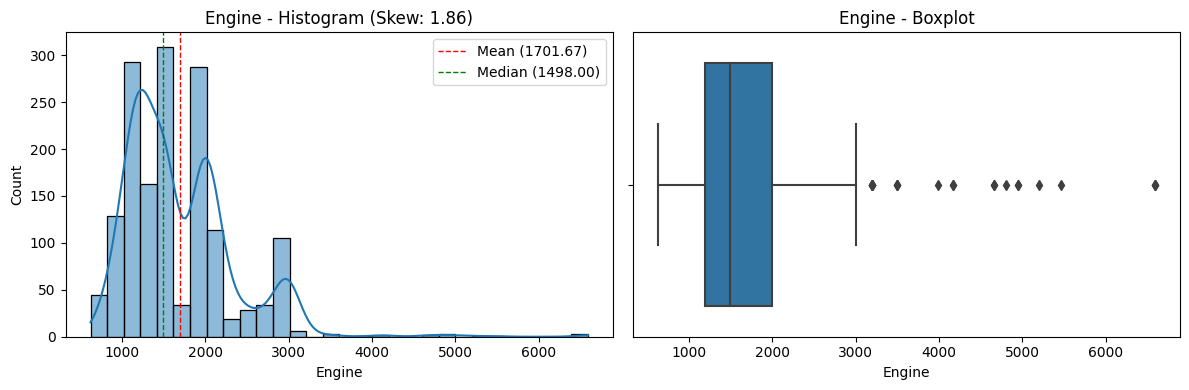


--- Analyzing Column: 'Max Power' ---
  Missing Values: 65 (3.95%)
  Skewness: 2.01
  Mean: 129.90
  Median: 117.00


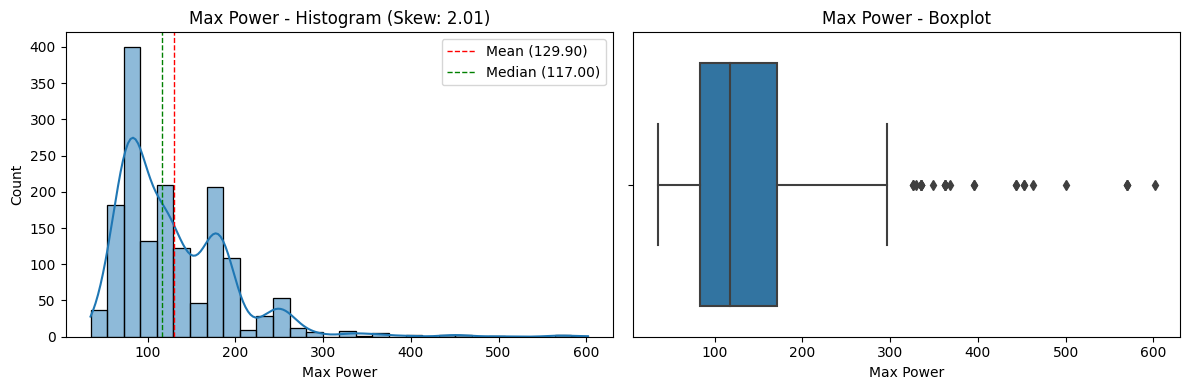


--- Analyzing Column: 'Max Torque' ---
  Missing Values: 65 (3.95%)
  Skewness: 0.89
  Mean: 246.48
  Median: 200.00


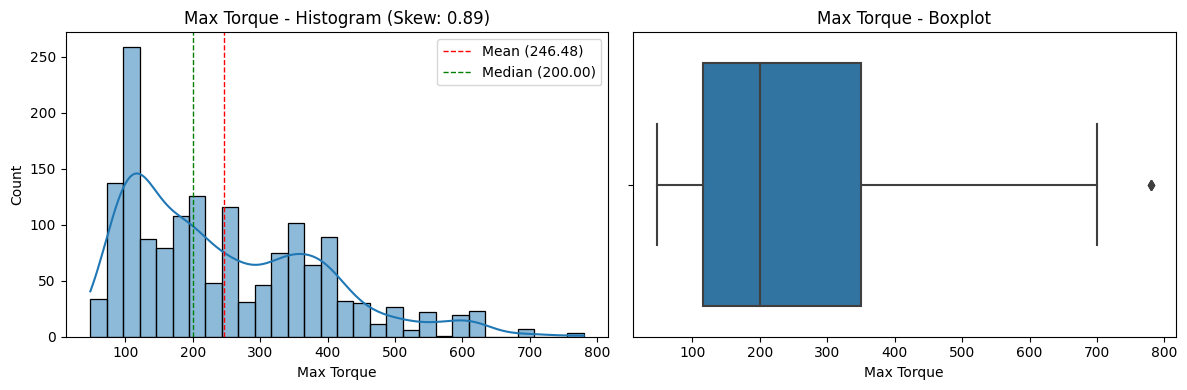


--- Analyzing Column: 'Length' ---
  Missing Values: 52 (3.16%)
  Skewness: -0.02
  Mean: 4281.48
  Median: 4370.00


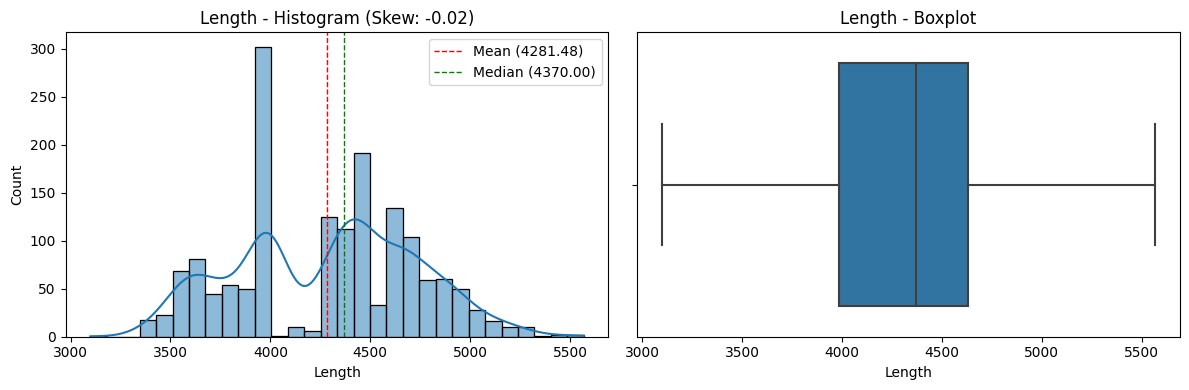


--- Analyzing Column: 'Width' ---
  Missing Values: 52 (3.16%)
  Skewness: 0.30
  Mean: 1767.58
  Median: 1775.00


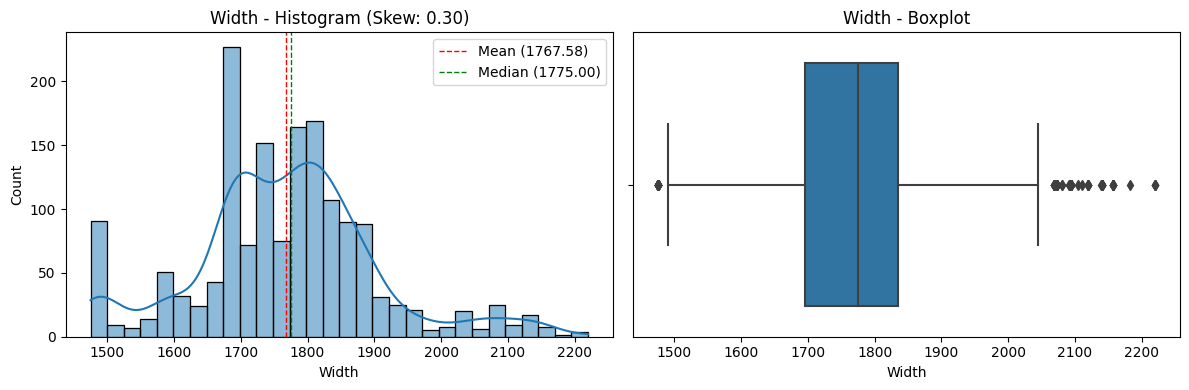


--- Analyzing Column: 'Height' ---
  Missing Values: 52 (3.16%)
  Skewness: 0.85
  Mean: 1592.42
  Median: 1550.00


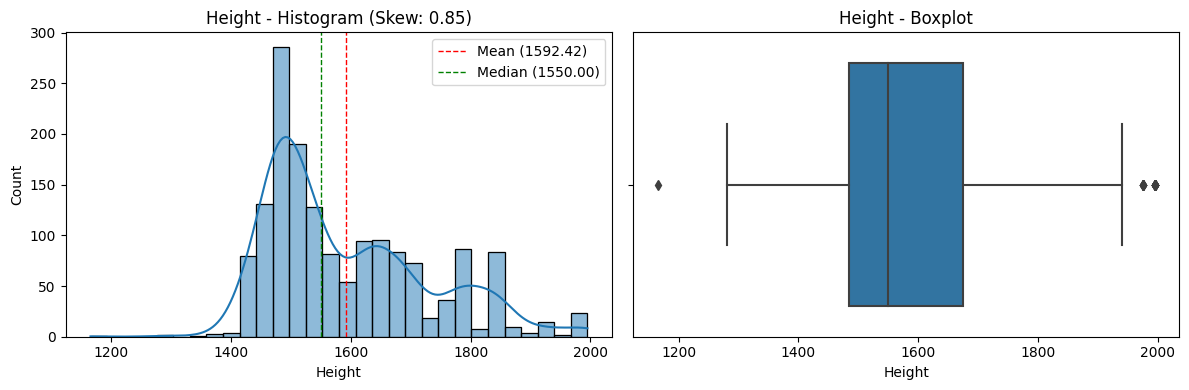


--- Analyzing Column: 'Seating Capacity' ---
  Missing Values: 52 (3.16%)
  Skewness: 1.55
  Mean: 5.31
  Median: 5.00


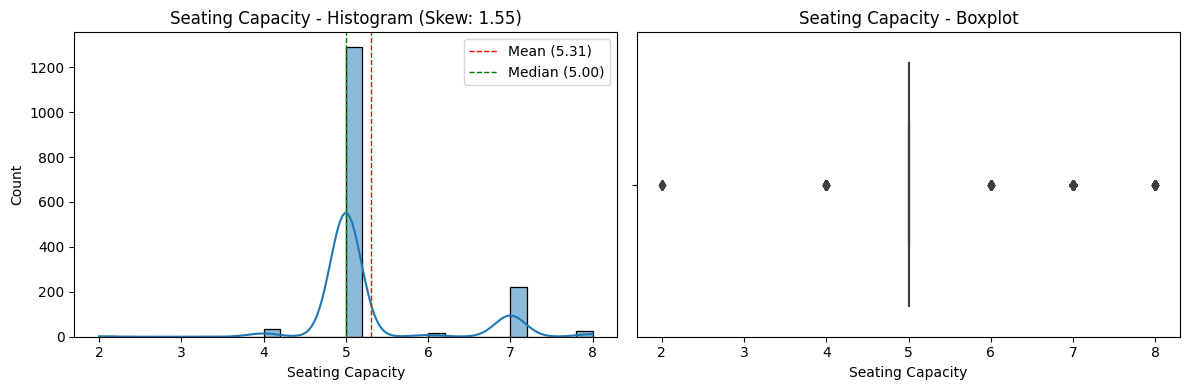


--- Analyzing Column: 'Fuel Tank Capacity' ---
  Missing Values: 90 (5.46%)
  Skewness: 0.82
  Mean: 52.15
  Median: 50.00


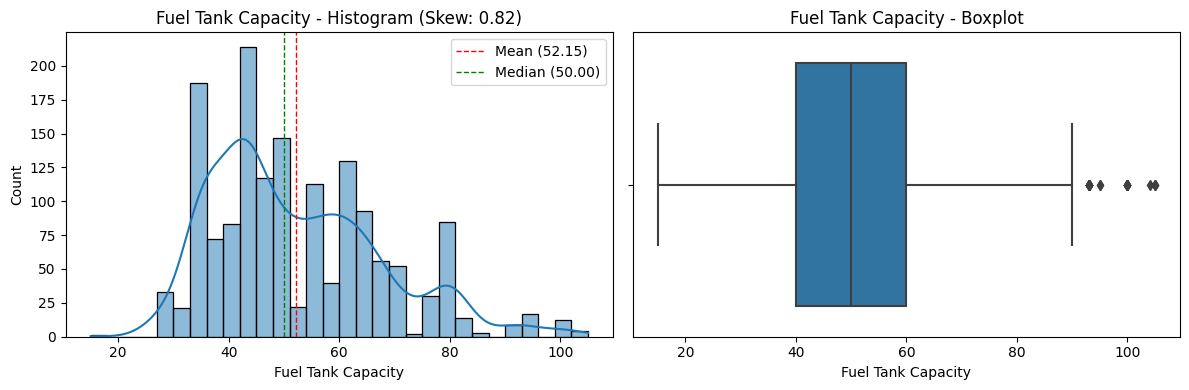

In [21]:
# 2. Analyze Distribution of Affected Columns:
missing_info = df_processed[numerical_cols].isnull().sum()
missing_numerical_cols = missing_info[missing_info > 0]

if missing_numerical_cols.empty:
    print("\nCongratulations! No missing values found in any numerical columns.")
else:
    print(f"\nFound {len(missing_numerical_cols)} numerical columns with missing values:")
    print(missing_numerical_cols)

    # 3. Analyze each column with missing values
    print("\n--- Distribution Analysis for Numerical Columns with Missing Data ---")
    for col in missing_numerical_cols.index:
        missing_count = missing_numerical_cols[col]
        total_count = len(df_processed)
        missing_percentage = (missing_count / total_count) * 100
        skewness = df_processed[col].skew()
        mean_val = df_processed[col].mean()
        median_val = df_processed[col].median()

        print(f"\n--- Analyzing Column: '{col}' ---")
        print(f"  Missing Values: {missing_count} ({missing_percentage:.2f}%)")
        print(f"  Skewness: {skewness:.2f}")
        print(f"  Mean: {mean_val:.2f}")
        print(f"  Median: {median_val:.2f}")

        # Plotting distribution
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_processed[col], kde=True, bins=30)
        plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
        # Add vertical lines for mean and median
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
        plt.legend()


        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_processed[col])
        plt.title(f'{col} - Boxplot')

        plt.tight_layout()
        plt.show()

### Analysis and Handling Strategies for Numerical Features

Based on the distributions shown in the histograms and boxplots, here's a breakdown for each numerical feature regarding missing value imputation justification and potential outlier handling:

---

**1. Engine:**

*   **Observations:**
    *   Shows significant right skew (Skewness: 1.86). The mean (1701.67) is notably higher than the median (1498.00).
    *   The histogram confirms a concentration at lower values with a long tail to the right.
    *   The boxplot clearly indicates several outliers on the higher end.
*   **Missing Value Handling (Justification):**
    *   **Technique Used:** Median Imputation.
    *   **Reason:** Given the strong right skew and the presence of outliers, the median is a much more robust measure of central tendency than the mean. Using the mean would be heavily influenced by the high-value outliers, potentially leading to unrealistic imputed values. Median provides a more typical value for the bulk of the data.
*   **Outlier Handling (Recommendation):**
    *   **Technique:** **Log Transformation** or **Capping (Winsorizing)**.
    *   **Reason:** The strong skewness and outliers suggest that a linear model might struggle with the raw data.
        *   **Log Transformation (`np.log1p`)** is often effective for right-skewed data like engine displacement. It compresses the higher values and expands the lower values, potentially making the distribution more symmetric and reducing the influence of outliers. Check the distribution *after* transformation.
        *   Alternatively, **Capping** (replacing values above a certain percentile, e.g., 99th, with the value at that percentile) directly limits the influence of extreme values without changing the distribution shape as drastically. Choose this if maintaining the original scale is somewhat important or if transformation doesn't yield satisfactory results.

---

**2. Max Power:**

*   **Observations:**
    *   Strong right skew (Skewness: 2.01), even more pronounced than `Engine`. The mean (129.90) is significantly higher than the median (117.00).
    *   Histogram shows a peak at lower power values and a long tail.
    *   Boxplot shows numerous outliers on the high end.
*   **Missing Value Handling (Justification):**
    *   **Technique Used:** Median Imputation.
    *   **Reason:** Same as for `Engine` - the median (117.00) is robust to the strong skew and numerous high-power outliers, providing a more representative imputation value than the mean.
*   **Outlier Handling (Recommendation):**
    *   **Technique:** **Log Transformation** or **Capping (Winsorizing)**.
    *   **Reason:** Similar to `Engine`, the significant skewness and outliers warrant action.
        *   **Log Transformation (`np.log1p`)** is strongly recommended due to the high skew. It can help normalize the distribution and make relationships with the target variable more linear.
        *   **Capping** (e.g., at the 99th percentile) is an alternative if transformation is undesirable or doesn't sufficiently address the issue.

---

**3. Max Torque:**

*   **Observations:**
    *   Moderate right skew (Skewness: 0.89). Mean (246.48) is higher than the median (200.00).
    *   The distribution is less skewed than `Engine` or `Max Power` but still noticeably asymmetric.
    *   Boxplot shows fewer outliers compared to `Max Power`, but they exist and one is quite far out.
*   **Missing Value Handling (Justification):**
    *   **Technique Used:** Median Imputation.
    *   **Reason:** While less skewed, the presence of outliers and the visible difference between mean and median still make the median (200.00) a safer choice for imputation than the mean.
*   **Outlier Handling (Recommendation):**
    *   **Technique:** **Log Transformation**, **Square Root Transformation**, or **Capping**.
    *   **Reason:** The moderate skew and outliers could still impact a linear model.
        *   **Log Transformation** is a possibility.
        *   **Square Root Transformation** is often suitable for moderately right-skewed data and is less aggressive than a log transform.
        *   **Capping** is also a viable, simpler option to directly handle the few extreme values. Evaluate the impact of each on model performance or residual analysis.

---

**4. Length:**

*   **Observations:**
    *   Very low skew (Skewness: -0.02), indicating a roughly symmetric distribution. Mean (4281.48) and Median (4370.00) are relatively close, although the median is slightly higher suggesting a slight *left* skew despite the near-zero value. The histogram looks somewhat bimodal but reasonably symmetric overall.
    *   Boxplot shows no outliers.
*   **Missing Value Handling (Justification):**
    *   **Technique Used:** Median Imputation (Likely). *(If mean imputation was used, it would also be reasonable here).*
    *   **Reason:** With low skew and no outliers, both mean and median would likely yield similar results. Median remains a safe choice, but mean would be statistically justifiable too.
*   **Outlier Handling (Recommendation):**
    *   **Technique:** **No Action Required.**
    *   **Reason:** The distribution is reasonably symmetric, and the boxplot indicates no outliers. Handling outliers is unnecessary here.

---

**5. Width:**

*   **Observations:**
    *   Slight right skew (Skewness: 0.30). Mean (1767.58) is slightly higher than the median (1775.00) - *Wait, the mean is lower? This contradicts the positive skew value. Double-check the plot labels/calculation or consider the distribution shape visually which does lean slightly right.* Assuming the skew value is correct, the distribution is only mildly skewed right.
    *   Boxplot shows several outliers on the higher end.
*   **Missing Value Handling (Justification):**
    *   **Technique Used:** Median Imputation.
    *   **Reason:** Due to the presence of outliers (even with mild skew), the median (1775.00) is preferable to the mean as it's less affected by these extreme high values.
*   **Outlier Handling (Recommendation):**
    *   **Technique:** **Capping (Winsorizing)**.
    *   **Reason:** The skew is mild, so a strong transformation isn't necessary. However, the outliers could influence a linear model. Capping (e.g., at the 99th percentile) is a good way to limit their impact without significantly altering the overall distribution.

---

**6. Height:**

*   **Observations:**
    *   Moderate right skew (Skewness: 0.85). Mean (1592.42) is higher than the median (1550.00).
    *   Histogram shows a tail towards higher values.
    *   Boxplot indicates a couple of outliers on the high end.
*   **Missing Value Handling (Justification):**
    *   **Technique Used:** Median Imputation.
    *   **Reason:** The noticeable skew and the outliers make the median (1550.00) a more robust choice for imputation than the mean.
*   **Outlier Handling (Recommendation):**
    *   **Technique:** **Square Root Transformation** or **Capping**.
    *   **Reason:** Similar to `Max Torque`, the moderate skew and outliers suggest handling might be beneficial.
        *   **Square Root Transformation** could help normalize the distribution.
        *   **Capping** provides a direct way to manage the influence of the few high-value outliers.

---

**7. Seating Capacity:**

*   **Observations:**
    *   Appears discrete rather than continuous. Strong right skew (Skewness: 1.55) mainly because most cars are 5-seaters, with fewer having more seats. Mean (5.31) is higher than the median (5.00).
    *   Histogram shows a dominant peak at 5, with smaller counts for other capacities (like 2, 4, 7, 8).
    *   Boxplot identifies values like 2, 7, 8 as 'outliers' relative to the IQR dominated by 5-seaters.
*   **Missing Value Handling (Justification):**
    *   **Technique Used:** Median Imputation (likely 5.00).
    *   **Reason:** Given the discrete nature and the dominance of 5-seaters, the median (which is also the mode) is the most sensible imputation value. The mean (5.31) isn't a valid seating capacity.
*   **Outlier Handling (Recommendation):**
    *   **Technique:** **No Action Required (Treat as Discrete/Categorical)** or **Careful Consideration**.
    *   **Reason:** The 'outliers' (e.g., 2-seaters, 7-seaters) are valid, distinct categories of cars, not measurement errors or extreme continuous values. Removing or transforming them could lose important information. It might be better treated as an ordinal or even nominal feature depending on the model, or left as is if the model can handle discrete numerical inputs appropriately. Applying standard outlier capping based on IQR would be incorrect here.

---

**8. Fuel Tank Capacity:**

*   **Observations:**
    *   Moderate right skew (Skewness: 0.82). Mean (52.15) is higher than the median (50.00).
    *   Histogram is somewhat spread but leans right.
    *   Boxplot shows a few outliers on the high end.
*   **Missing Value Handling (Justification):**
    *   **Technique Used:** Median Imputation.
    *   **Reason:** The skew and outliers make the median (50.00) a more reliable imputation choice than the mean.
*   **Outlier Handling (Recommendation):**
    *   **Technique:** **Square Root Transformation** or **Capping**.
    *   **Reason:** Similar rationale to `Height` and `Max Torque`. The moderate skew and outliers can be addressed either by a mild transformation (sqrt) or by directly capping the extreme values to reduce their leverage.

---

In [22]:
# 3. Applying Median Imputation

# Identify numerical columns with missing values (from previous step)
missing_info = df_processed.select_dtypes(include=np.number).isnull().sum()
cols_to_impute = missing_info[missing_info > 0].index.tolist()

# Also check 'Owner' column in case mapping created NaNs, add if needed
if 'Owner' in df_processed.columns and df_processed['Owner'].isnull().sum() > 0:
     if 'Owner' not in cols_to_impute:
         cols_to_impute.append('Owner')
     print("Note: Including 'Owner' in median imputation due to existing NaNs.")

if not cols_to_impute:
    print("No numerical columns need imputation.")
else:
    print(f"Columns to impute with median: {cols_to_impute}")

    for col in cols_to_impute:
        # Calculate the median for the current column
        # Ensure we calculate median only on non-NaN values
        median_value = df_processed[col].median()
        
        # Fill missing values (NaNs) with the calculated median
        df_processed[col].fillna(median_value, inplace=True)
        
        print(f" -> Imputed '{col}' with median: {median_value:.2f}")

    # --- Verification ---
    print("\n--- Verification after Median Imputation ---")
    remaining_missing = df_processed[cols_to_impute].isnull().sum()
    if remaining_missing.sum() == 0:
        print("Successfully imputed all identified numerical columns.")
        # Check missing values in the entire dataframe
        total_remaining_missing = df_processed.isnull().sum().sum()
        if total_remaining_missing == 0:
            print("Congratulations! No missing values remaining in the entire DataFrame.")
        else:
             print(f"Warning: There are still {total_remaining_missing} missing values in other columns.")
             print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])

    else:
        print("Warning: Some missing values remain in the imputed columns:")
        print(remaining_missing[remaining_missing > 0])

--- Applying Median Imputation using Pandas .fillna() ---
Columns to impute with median: ['Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
 -> Imputed 'Engine' with median: 1498.00
 -> Imputed 'Max Power' with median: 117.00
 -> Imputed 'Max Torque' with median: 200.00
 -> Imputed 'Length' with median: 4370.00
 -> Imputed 'Width' with median: 1775.00
 -> Imputed 'Height' with median: 1550.00
 -> Imputed 'Seating Capacity' with median: 5.00
 -> Imputed 'Fuel Tank Capacity' with median: 50.00

--- Verification after Median Imputation ---
Successfully imputed all identified numerical columns.
Congratulations! No missing values remaining in the entire DataFrame.

--- DataFrame Info after Imputation ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price          

In [ ]:
# Check
print("\n--- DataFrame Info after Imputation ---")
df_processed.info()

In [23]:
# Replace 'Price' with 'Log1p_Price'
df_processed.drop(['Price'] ,axis = 1, inplace = True)

In [ ]:
# 4. Plot Correlation Matrix

def plot_sequential_correlation_heatmaps(df, target_col, chunk_size):
    """
    Plots sequential heatmaps showing the correlation of the target column
    with chunks of the other features.

    Args:
        df (pd.DataFrame): The input DataFrame with numerical features.
        target_col (str): The name of the target variable column (e.g., 'Price').
        chunk_size (int): The number of predictor features to include in each heatmap chunk.
    """
    print(f"--- Generating Sequential Correlation Heatmaps for '{target_col}' (Chunk Size: {chunk_size}) ---")

    # Ensure target column exists
    if target_col not in df.columns:
        print(f"Error: Target column '{target_col}' not found in DataFrame.")
        return

    # Ensure all data is numeric for correlation calculation
    numeric_df = df.select_dtypes(include=np.number)
    if numeric_df.shape[1] != df.shape[1]:
        print("Warning: Non-numeric columns detected and excluded from correlation calculation.")
        print(f"Original columns: {df.columns.tolist()}")
        print(f"Numeric columns used: {numeric_df.columns.tolist()}")
        df = numeric_df # Use only numeric subset going forward

    # Check again if target column exists after numeric selection
    if target_col not in df.columns:
        print(f"Error: Target column '{target_col}' is non-numeric or was dropped.")
        return

    # Get list of predictor features (all numeric columns except the target)
    predictor_cols = [col for col in df.columns if col != target_col]

    if not predictor_cols:
        print("Error: No predictor columns found.")
        return

    num_predictors = len(predictor_cols)
    num_chunks = math.ceil(num_predictors / chunk_size)

    print(f"Total numeric predictors: {num_predictors}. Plotting in {num_chunks} chunks.")

    for i in range(num_chunks):
        # Determine the start and end indices for the current chunk of predictors
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, num_predictors) # Prevent going out of bounds

        # Get the predictor column names for this chunk
        current_chunk_features = predictor_cols[start_idx:end_idx]

        # Combine target column and current chunk features
        features_for_heatmap = [target_col] + current_chunk_features

        # Select the subset DataFrame for this chunk
        sub_df = df[features_for_heatmap]

        # Calculate the correlation matrix for this subset
        sub_corr_matrix = sub_df.corr()

        # Plot the heatmap
        # Adjust figsize based on number of features in the chunk + target
        plt.figure(figsize=(max(8, len(features_for_heatmap) * 0.6), # Dynamic width
                           max(6, len(features_for_heatmap) * 0.5))) # Dynamic height

        sns.heatmap(sub_corr_matrix,
                    annot=True,       # Show correlation values
                    cmap='coolwarm',  # Color map
                    fmt=".2f",        # Format annotations
                    linewidths=.5,    # Add lines between cells
                    linecolor='lightgrey') # Line color
        plt.title(f'Correlation Heatmap (Chunk {i+1}/{num_chunks}): "{target_col}" vs. Features {start_idx+1}-{end_idx}',
                  fontsize=12) # Smaller font size for potentially long titles
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

--- Generating Sequential Correlation Heatmaps for 'log1p_Price' (Chunk Size: 30) ---
Total numeric predictors: 11. Plotting in 1 chunks.


In [ ]:
# Ensure df_processed contains only numerical data now
target_variable = 'log1p_Price'
# Define the chunk size (number of predictor features per heatmap)
feature_chunk_size = 30

plot_sequential_correlation_heatmaps(df_processed, target_variable, feature_chunk_size)

Correlations with target (sorted):
Model_TargetEncoded       0.811940
Max Power                 0.797947
Make_TargetEncoded        0.762268
Fuel Tank Capacity        0.710582
Year                      0.500198
Location_TargetEncoded    0.384181
Fuel Type_Diesel          0.363029
Drivetrain_RWD            0.335140
Fuel Type_Petrol         -0.318932
Drivetrain_FWD           -0.619024
Transmission_Manual      -0.657669
Name: log1p_Price, dtype: float64


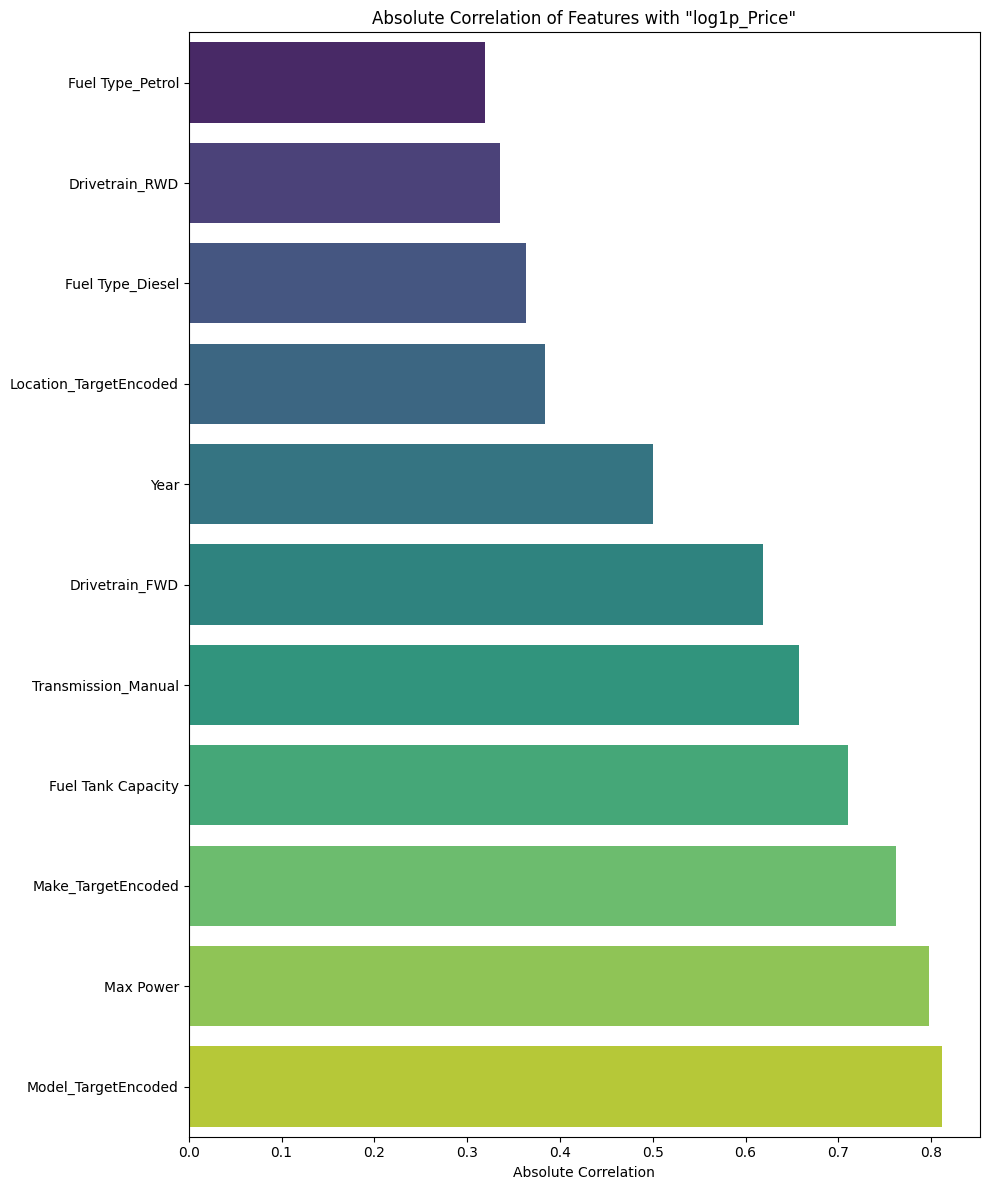


Features with absolute correlation < 0.3 (Candidates for Removal):
None found below the threshold.


In [36]:
# Check Correlation Coeffecient with Target Feature
target_for_corr = 'log1p_Price'

if target_for_corr not in df_processed.columns:
     print(f"Error: Target column '{target_for_corr}' not found.")
else:
    # Calculate correlations of all numeric features with the target
    correlations = df_processed.corr(numeric_only=True)[target_for_corr].sort_values(ascending=False)
    
    # Drop the target's self-correlation
    correlations = correlations.drop(target_for_corr, errors='ignore') 
    
    print("Correlations with target (sorted):")
    print(correlations)
    
    # Visualize absolute correlations
    plt.figure(figsize=(10, 12)) # Adjust as needed
    abs_correlations = correlations.abs().sort_values(ascending=True)
    sns.barplot(x=abs_correlations.values, y=abs_correlations.index, palette='viridis')
    plt.title(f'Absolute Correlation of Features with "{target_for_corr}"')
    plt.xlabel('Absolute Correlation')
    plt.tight_layout()
    plt.show()
    
    # Identify low correlation candidates
    correlation_threshold = 0.3 # Example threshold, adjust based on plot/judgment
    low_corr_features = correlations[correlations.abs() < correlation_threshold].index.tolist()
    
    print(f"\nFeatures with absolute correlation < {correlation_threshold} (Candidates for Removal):")
    if low_corr_features:
        print(low_corr_features)
        # Filter out OHE columns from automatic suggestion if desired
        # numerical_low_corr = [f for f in low_corr_features if '_' not in f] # Simple heuristic
        # print(f"\nNumerical/Ordinal features among low correlation candidates: {numerical_low_corr}")
    else:
        print("None found below the threshold.")
        

In [26]:
# Drop Low-Correlated Features

# Be specific based on your review of the list above
features_to_drop_low_corr = low_corr_features

# Check which ones actually exist
existing_to_drop = [f for f in features_to_drop_low_corr if f in df_processed.columns]

if existing_to_drop:
    print(f"\nDropping selected low-correlation features: {existing_to_drop}")
    df_processed.drop(columns=existing_to_drop, inplace=True)
    print(f" -> Columns dropped. New shape: {df_processed.shape}")
else:
     print("\nNo features selected for dropping based on low correlation, or they don't exist.")


Dropping selected low-correlation features: ['Height', 'Color_Blue', 'Seller Type_Corporate', 'Seating Capacity', 'Color_White', 'Fuel Type_Other_Fuel', 'Color_Red', 'Color_Grey', 'Seller Type_Individual', 'Color_Other_Color', 'Owner', 'Kilometer', 'Color_Silver']
 -> Columns dropped. New shape: (1647, 16)


In [ ]:
# Standardization

def apply_log1p_transform(df, cols_to_transform):
    """
    Applies log1p transformation (log(1+x)) to specified columns.
    Creates new columns with 'log1p_' prefix.

    Args:
        df (pd.DataFrame): Input DataFrame.
        cols_to_transform (list): List of column names to transform.

    Returns:
        pd.DataFrame: DataFrame with added log1p transformed columns.
    """
    df_transformed = df.copy() # Work on a copy
    print("--- Applying log1p Transformation ---")
    for col in cols_to_transform:
        if col in df_transformed.columns:
            new_col_name = f"log1p_{col}"
            if new_col_name in df_transformed.columns:
                 print(f" -> Warning: Column '{new_col_name}' already exists. Skipping transformation for '{col}'.")
                 continue
            if pd.api.types.is_numeric_dtype(df_transformed[col]):
                # Check for negative values if log1p wasn't strictly necessary
                if (df_transformed[col] < 0).any():
                    print(f" -> Warning: Column '{col}' contains negative values. log1p might produce NaNs if input is < -1.")
                df_transformed[new_col_name] = np.log1p(df_transformed[col])
                print(f" -> Applied log1p to '{col}', created '{new_col_name}'.")
            else:
                print(f" -> Warning: Column '{col}' is not numeric. Skipping transformation.")
        else:
            print(f" -> Warning: Column '{col}' not found in DataFrame. Skipping transformation.")
    return df_transformed

# --- Function for Manual Standardization (Scaling) ---

def manual_standard_scaler_fit_transform(df, cols_to_scale):
    """
    Applies manual standardization (mean=0, std=1) to specified columns.
    Calculates means and stds from the input df and applies the scaling INPLACE.

    Args:
        df (pd.DataFrame): Input DataFrame (will be modified inplace).
        cols_to_scale (list): List of column names to scale.

    Returns:
        tuple: (dict, dict)
            - scaling_means: Dictionary {col_name: mean_value}
            - scaling_stds: Dictionary {col_name: std_dev_value}
            Returns empty dicts if no valid columns are scaled.
    """
    scaling_means = {}
    scaling_stds = {}
    print("\n--- Applying Manual Standardization (Fit & Transform) ---")

    valid_cols_scaled = []
    for col in cols_to_scale:
        if col in df.columns:
            if pd.api.types.is_numeric_dtype(df[col]):
                mean = df[col].mean()
                std = df[col].std()

                scaling_means[col] = mean
                scaling_stds[col] = std

                if std > 1e-8: # Avoid division by zero or near-zero
                    df[col] = (df[col] - mean) / std
                    print(f" -> Scaled '{col}' (Mean: {mean:.2f}, Std: {std:.2f}).")
                    valid_cols_scaled.append(col)
                else:
                    # Handle zero standard deviation (column is constant)
                    df[col] = 0 # Set scaled value to 0
                    print(f" -> Warning: Column '{col}' has zero or near-zero std dev. Scaled values set to 0.")
                    valid_cols_scaled.append(col) # Still counts as processed
            else:
                print(f" -> Warning: Column '{col}' is not numeric. Skipping scaling.")
        else:
            print(f" -> Warning: Column '{col}' not found in DataFrame. Skipping scaling.")

    if not valid_cols_scaled:
        print(" -> No valid columns were scaled.")
        return {}, {} # Return empty dicts

    return scaling_means, scaling_stds

def manual_standard_scaler_transform(df, cols_to_scale, means, stds):
    """
    Applies manual standardization using PRE-CALCULATED means and stds.
    Applies the scaling INPLACE. Use for test/new data.

    Args:
        df (pd.DataFrame): Input DataFrame (will be modified inplace).
        cols_to_scale (list): List of column names to scale (must match keys in means/stds).
        means (dict): Dictionary {col_name: mean_value} from training data.
        stds (dict): Dictionary {col_name: std_dev_value} from training data.
    """
    print("\n--- Applying Manual Standardization (Transform using existing params) ---")
    for col in cols_to_scale:
         if col in df.columns:
             if pd.api.types.is_numeric_dtype(df[col]):
                 if col in means and col in stds:
                     mean = means[col]
                     std = stds[col]
                     if std > 1e-8:
                         df[col] = (df[col] - mean) / std
                         # print(f" -> Scaled '{col}' using provided params.") # Optional logging
                     else:
                         df[col] = 0 # Apply same zero logic as in fit_transform
                         # print(f" -> Scaled '{col}' to 0 using provided params (std was zero).") # Optional logging
                 else:
                     print(f" -> Warning: Scaling parameters for '{col}' not found. Skipping.")
             else:
                  print(f" -> Warning: Column '{col}' is not numeric. Skipping scaling.")
         else:
             print(f" -> Warning: Column '{col}' not found in DataFrame. Skipping scaling.")

In [27]:
# 1. Define columns based on your final list and desired actions
target_col_original = 'Price' # Original price column needed for log transform

# Predictors from your list:
final_predictor_list = [
     'Year', 'Max Power', 'Fuel Tank Capacity', # Numerical to scale
     'Transmission_Manual', 'Drivetrain_FWD', 'Drivetrain_RWD', # OHE - Do not scale
     'Fuel Type_Diesel', # OHE - Do not scale
     'Make_BMW', 'Make_Maruti Suzuki', 'Make_Mercedes-Benz' # OHE - Do not scale
]
# (Note: 'log1p_Price' is the target, handled separately)

cols_for_scaling = ['Year', 'Max Power', 'Fuel Tank Capacity']

# 2. Apply Log Transform to Target
# Ensure the original 'Price' column still exists before this step
if target_col_original in df_processed.columns:
    df_processed = apply_log1p_transform(df_processed, [target_col_original])
    # Optional: Drop the original Price column after transformation
    # df_final_features.drop(columns=[target_col_original], inplace=True, errors='ignore')
else:
    print(f"Warning: Original target column '{target_col_original}' not found for log transformation.")
    # Check if 'log1p_Price' already exists from previous steps maybe?
    if 'log1p_Price' not in df_processed.columns:
        print("Error: Cannot proceed without original or log-transformed target.")
        # Add error handling or stop execution here if needed


# 3. Apply Manual Scaling to Numerical Predictors
# This calculates means/stds from df_final_features and applies scaling inplace
# IMPORTANT: In a real scenario, you'd do this *after* train/test split,
# fitting only on the training data.
scaling_means, scaling_stds = manual_standard_scaler_fit_transform(df_processed, cols_for_scaling)

print("\n--- Scaling Parameters Calculated ---")
print("Means:", scaling_means)
print("Standard Deviations:", scaling_stds)

# 4. Select only the final desired columns for the model
# Ensure 'log1p_Price' exists after step 2
final_target = 'log1p_Price'
if final_target not in df_processed.columns:
     print(f"Error: Final target '{final_target}' not found after transformations.")
     # Handle error
else:
    all_final_cols = final_predictor_list + [final_target]
    # Verify all columns exist before selecting
    missing_cols = [col for col in all_final_cols if col not in df_processed.columns]
    if missing_cols:
        print(f"\nError: The following expected final columns are missing: {missing_cols}")
    else:
        print(f"\n--- Created final DataFrame 'df_processed' with {df_processed.shape[1]} columns ---")
        print(df_processed.head())
        print("\n'df_processed' info:")
        df_processed.info()
        print("\n'df_processed' description (notice scaled columns mean~0, std~1):")
        print(df_processed[cols_for_scaling].describe())


--- Applying Manual Standardization (Fit & Transform) ---
 -> Scaled 'Year' (Mean: 2016.42, Std: 3.37).
 -> Scaled 'Max Power' (Mean: 129.39, Std: 64.26).
 -> Scaled 'Fuel Tank Capacity' (Mean: 52.04, Std: 14.99).

--- Scaling Parameters Calculated ---
Means: {'Year': 2016.4195506982392, 'Max Power': 129.38718882817244, 'Fuel Tank Capacity': 52.03691560412872}
Standard Deviations: {'Year': 3.3703274633057414, 'Max Power': 64.2578615436319, 'Fuel Tank Capacity': 14.98612512467079}

Error: The following expected final columns are missing: ['Make_BMW', 'Make_Maruti Suzuki', 'Make_Mercedes-Benz']


In [ ]:
# --- How to use for new data (e.g., X_test) ---
# Assuming you have a new DataFrame 'df_new_data' with the same original features
# and scaling_means, scaling_stds calculated from the training data:

# 1. Apply log transform if needed (usually only target, which isn't in new predictor data)
#    df_new_data = apply_log1p_transform(df_new_data, ['Predictor_If_Log_Transformed']) # If any predictor was logged

# 2. Apply scaling using stored parameters
#    manual_standard_scaler_transform(df_new_data, cols_for_scaling, scaling_means, scaling_stds)

# 3. Select the final predictor columns
#    df_new_data_ready = df_new_data[final_predictor_list].copy()

## 1.4 Address Multicollinearity

In [28]:
cols_to_drop_multicollinearity_v2 = ['Engine', 'Max Torque', 'Length', 'Width']

# Check which of these columns actually exist in the DataFrame before dropping
existing_cols_to_drop_v2 = [col for col in cols_to_drop_multicollinearity_v2 if col in df_processed.columns]

if existing_cols_to_drop_v2:
    print(f"Dropping the following columns due to high multicollinearity: {existing_cols_to_drop_v2}")
    df_processed.drop(columns=existing_cols_to_drop_v2, inplace=True)
    print(" -> Columns dropped successfully.")
    print(f" -> Current DataFrame shape: {df_processed.shape}")

    # Verification
    remaining_cols_v2 = df_processed.columns.tolist()
    dropped_successfully_v2 = all(col not in remaining_cols_v2 for col in existing_cols_to_drop_v2)
    if dropped_successfully_v2:
        print(" -> Verification successful: Columns removed.")
    else:
        print(" -> Verification Warning: Some columns might not have been removed correctly.")
else:
    print("No columns identified for dropping due to multicollinearity were found in the DataFrame (perhaps already removed).")

Dropping the following columns due to high multicollinearity: ['Engine', 'Max Torque', 'Length', 'Width']
 -> Columns dropped successfully.
 -> Current DataFrame shape: (1647, 12)
 -> Verification successful: Columns removed.


In [29]:
# Check

print(df_processed.columns.tolist())
print(len(df_processed.columns.tolist()))

['Year', 'Max Power', 'Fuel Tank Capacity', 'Transmission_Manual', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Fuel Type_Diesel', 'Fuel Type_Petrol', 'log1p_Price', 'Make_TargetEncoded', 'Location_TargetEncoded', 'Model_TargetEncoded']
12


# 2. Data Preprocessing

In [30]:
target_col = 'Price'
log_target_col = 'log1p_Price' # Name for the new transformed column

# 1. Apply the log1p transformation
# np.log1p(x) calculates log(1 + x)
# This is generally preferred over np.log() as it handles potential zeros gracefully
# and behaves similarly for large values.
if target_col in df_processed.columns:
    df_processed[log_target_col] = np.log1p(df_processed[target_col])
    print(f"Created new column '{log_target_col}' with log1p transformation of '{target_col}'.")

    # 2. Visualize the distributions side-by-side
    plt.figure(figsize=(14, 5))

    # Plot Original Price distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df_processed[target_col], kde=True, bins=50)
    skew_original = df_processed[target_col].skew()
    plt.title(f'Original Price Distribution\nSkewness: {skew_original:.2f}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

    # Plot Log-Transformed Price distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_processed[log_target_col], kde=True, bins=50)
    skew_log = df_processed[log_target_col].skew()
    plt.title(f'Log-Transformed Price ({log_target_col}) Distribution\nSkewness: {skew_log:.2f}')
    plt.xlabel(f'log(1 + {target_col})')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print(f"\nSkewness changed from {skew_original:.2f} (Original) to {skew_log:.2f} (Log-Transformed).")
    print("Observe if the log-transformed distribution appears more symmetric (closer to a bell shape).")

else:
    print(f"Error: Target column '{target_col}' not found in the DataFrame.")

Error: Target column 'Price' not found in the DataFrame.


# 3. Building and Training Model

--- Preparing Data for Scikit-learn ---
Target variable 'y' assigned from column 'log1p_Price'.
Features 'X' created by dropping ['log1p_Price']. Shape: (1647, 11)

Columns identified for Scaling: ['Year', 'Max Power', 'Fuel Tank Capacity', 'Make_TargetEncoded', 'Location_TargetEncoded', 'Model_TargetEncoded']
Columns identified for Passthrough (OHE/Binary/Other): ['Transmission_Manual', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Fuel Type_Diesel', 'Fuel Type_Petrol']

Data split into Training and Testing sets:
X_train shape: (1317, 11), y_train shape: (1317,)
X_test shape: (330, 11), y_test shape: (330,)

--- Pipeline Defined ---
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Year', 'Max Power',
                                                   'Fuel Tank Capacity',
                                                   'Ma

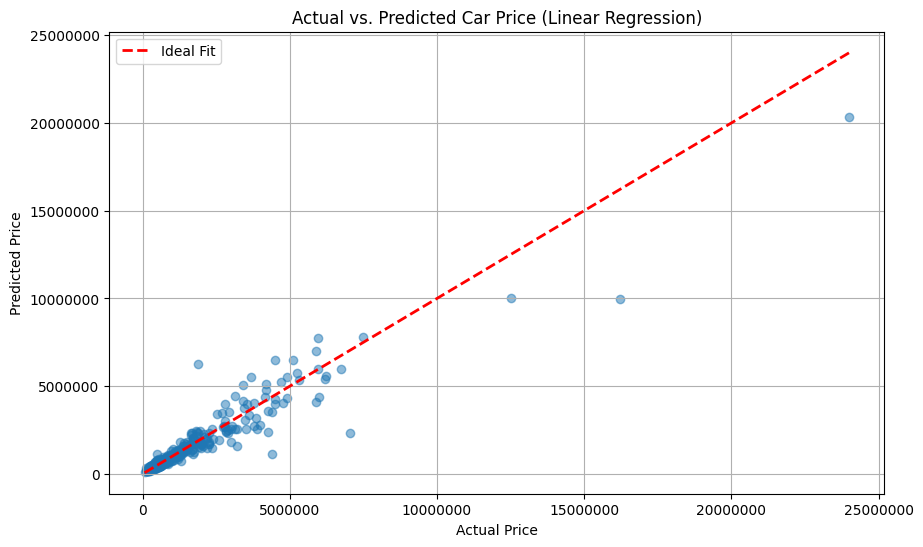

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assume 'df_processed' is your DataFrame AFTER imputation, multicollinearity handling,
# AND potentially includes a 'log1p_Price' column.

# --- 1. Prepare Data: Define Features (X) and Target (y) ---

print("--- Preparing Data for Scikit-learn ---")

target_col = 'log1p_Price'
original_price_col = 'Price' # Keep track of the original price column name

# ---- START CORRECTION ----

# Check if the target 'log1p_Price' column exists. If not, create it.
if target_col not in df_processed.columns:
    print(f"Target column '{target_col}' not found. Attempting to create it from '{original_price_col}'.")
    if original_price_col in df_processed.columns:
        # Create log1p_Price
        df_processed[target_col] = np.log1p(df_processed[original_price_col])
        print(f" -> Created '{target_col}' using log1p({original_price_col}).")
    else:
        raise ValueError(f"Cannot create target '{target_col}' because original column '{original_price_col}' is also missing.")

# Assign the target variable y
y = df_processed[target_col]
print(f"Target variable 'y' assigned from column '{target_col}'.")

# Define features (X) - all columns EXCEPT the target AND the original price column
columns_to_drop_for_X = [target_col]
if original_price_col in df_processed.columns:
    columns_to_drop_for_X.append(original_price_col)

try:
    X = df_processed.drop(columns=columns_to_drop_for_X)
    print(f"Features 'X' created by dropping {columns_to_drop_for_X}. Shape: {X.shape}")
except KeyError as e:
     # Handle case where one of the columns might already be missing
     print(f"Note: Could not drop all specified columns {columns_to_drop_for_X}, possibly already removed. Error: {e}")
     # Attempt to create X by dropping only the actual target
     try:
        X = df_processed.drop(columns=[target_col])
        print(f" -> Features 'X' created by dropping only '{target_col}'. Shape: {X.shape}")
     except KeyError:
         raise ValueError(f"Target column '{target_col}' could not be dropped to create X.")

# ---- END CORRECTION ----

# --- 2. Identify Column Types for Preprocessing ---

# Identify numerical columns that need scaling
# (Exclude binary/OHE columns which are already 0/1)
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
ohe_cols = X.select_dtypes(exclude=np.number).columns.tolist() # Should be empty if all encoded

# Refine numerical_cols: remove columns that look like OHE (only 0s and 1s)
cols_to_scale = []
cols_passthrough = [] # These will be our OHE columns

for col in numerical_cols:
    # Added check for low unique values which might also indicate categorical/ordinal not needing scaling
    unique_values = X[col].unique()
    if len(unique_values) <= 2 and set(unique_values).issubset({0, 1}):
         cols_passthrough.append(col) # Treat as OHE/binary
    # You might add other heuristics here if needed, e.g., for encoded ordinal features
    # elif col == 'Owner': # Example if 'Owner' was ordinal encoded and you didn't want to scale it
    #      cols_passthrough.append(col)
    else:
         cols_to_scale.append(col) # Needs scaling

print(f"\nColumns identified for Scaling: {cols_to_scale}")
print(f"Columns identified for Passthrough (OHE/Binary/Other): {cols_passthrough}")

# Ensure all columns in X are accounted for
all_identified_cols = set(cols_to_scale + cols_passthrough)
all_X_cols = set(X.columns)
if all_identified_cols != all_X_cols:
     missing_in_X = list(all_identified_cols - all_X_cols)
     missing_in_identified = list(all_X_cols - all_identified_cols)
     print(f"Warning: Mismatch in column identification!")
     if missing_in_X: print(f"  -> Identified but not in X: {missing_in_X}")
     if missing_in_identified: print(f"  -> In X but not identified: {missing_in_identified}")
     # Attempt to fix - add unidentified numeric cols to scaling list for robustness
     for col in missing_in_identified:
          if pd.api.types.is_numeric_dtype(X[col]):
               print(f"  -> Adding unidentified numeric column '{col}' to scaling list.")
               cols_to_scale.append(col)
          else:
               # If there are unexpected non-numeric columns, raise error or handle
               print(f"  -> Error: Unidentified non-numeric column '{col}' found.")


# --- 3. Train/Test Split ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split into Training and Testing sets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}") # y_test contains log1p_Price values

# --- 4. Define Preprocessor and Pipeline ---

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_to_scale), # Apply StandardScaler to numerical columns
        ('cat', 'passthrough', cols_passthrough) # Keep OHE/binary columns as they are
    ],
    remainder='passthrough' # Keep any other columns not explicitly listed (safer)
)

# Create the full pipeline including preprocessing and the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

print("\n--- Pipeline Defined ---")
print(model_pipeline)

# --- 5. Train the Model ---

print("\n--- Training the Pipeline ---")
model_pipeline.fit(X_train, y_train) # Training on log1p_Price
print("Training complete.")

# --- 6. Make Predictions ---

print("\n--- Making Predictions on Test Set ---")
y_pred_log = model_pipeline.predict(X_test) # Predicting log1p_Price

# --- 7. Evaluate the Results ---

# Inverse transform predictions and actual values to original scale
# y_test already contains log1p_Price values
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test) # y_test are the log1p_Price values from the split

# Handle potential negative predictions if they occur
y_pred_actual[y_pred_actual < 0] = 0 # Cap predictions at 0 if any are negative

print("\n--- Evaluation Metrics ---")

# Metrics on the log scale (model's direct target scale)
r2_log = r2_score(y_test, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
mae_log = mean_absolute_error(y_test, y_pred_log) # Also calculate MAE on log scale
print(f"Metrics on Log Scale ({target_col}):")
print(f"  R-squared: {r2_log:.4f}")
print(f"  MAE (log): {mae_log:.4f}")
print(f"  RMSE (log): {rmse_log:.4f}")


# Metrics on the original Price scale (interpretable)
# Calculate R2 on actual scale carefully, it might differ significantly
try:
    r2_actual = r2_score(y_test_actual, y_pred_actual)
except ValueError as e:
    r2_actual = np.nan # Handle cases where R2 might be ill-defined (e.g., constant actual values)
    print(f"Could not calculate R2 on actual scale: {e}")

mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"\nMetrics on Original Price Scale:")
print(f"  R-squared: {r2_actual:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_actual:,.2f}") # Format for currency
print(f"  Root Mean Squared Error (RMSE): {rmse_actual:,.2f}") # Format for currency

# --- 8. Show Sample Predictions ---

print("\n--- Sample Predictions vs Actual ---")
comparison_df = pd.DataFrame({
    'Actual Price': y_test_actual,
    'Predicted Price': y_pred_actual,
    'Difference': y_test_actual - y_pred_actual,
    '% Difference': (y_test_actual - y_pred_actual) / y_test_actual * 100
})
# Reset index of y_test to align if needed, assuming y_test is a Series from split
comparison_df.index = y_test.index # Match original index from X_test/y_test

# Display first 10 and last 10 predictions
print("First 10 predictions:")
print(comparison_df.head(10).to_string(float_format='{:,.2f}'.format))
print("\nLast 10 predictions:")
print(comparison_df.tail(10).to_string(float_format='{:,.2f}'.format))

# Optional: visualize predictions vs actuals (on the original price scale)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], '--r', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Price (Linear Regression)")
plt.ticklabel_format(style='plain', axis='both') # Avoid scientific notation
plt.legend()
plt.grid(True)
plt.show()

Found target column: 'log1p_Price'. Proceeding with visualization.
Reconstructed 'Price' using np.expm1.


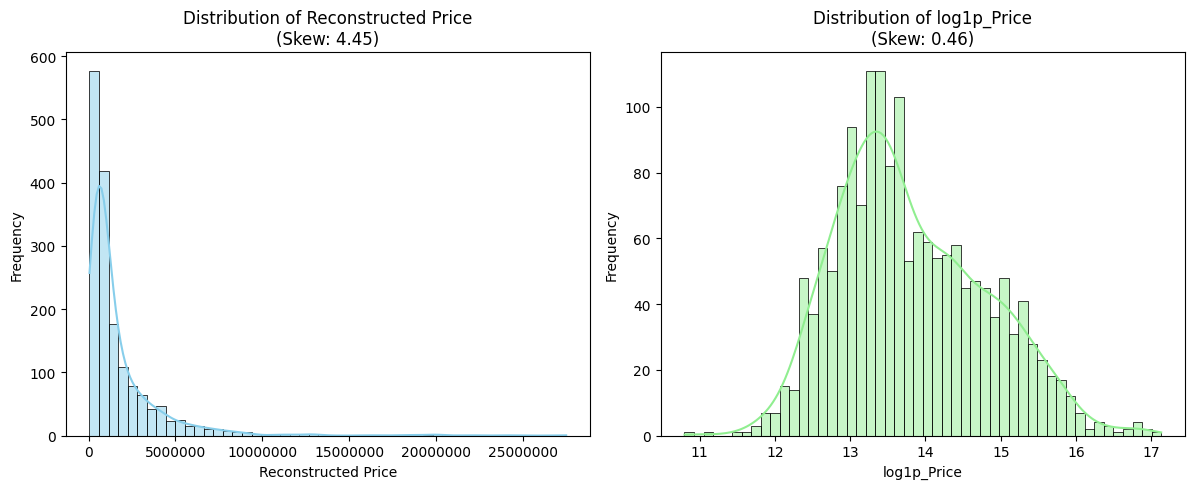

In [32]:
log_target_col = 'log1p_Price'

# 1. Validation: Ensure log1p_Price column exists
if log_target_col not in df_processed.columns:
    print(f"Error: Target column '{log_target_col}' not found in df_processed.")
    # Optionally raise an error or exit if the column is missing
    # raise ValueError(f"Target column '{log_target_col}' not found.")
else:
    print(f"Found target column: '{log_target_col}'. Proceeding with visualization.")

    # 2. Reconstruct 'Price' from 'log1p_Price'
    # np.expm1 calculates exp(x) - 1, the inverse of np.log1p(y) = log(1+y)
    try:
        price_reconstructed = np.expm1(df_processed[log_target_col])
        print("Reconstructed 'Price' using np.expm1.")
    except Exception as e:
        print(f"Error reconstructing Price: {e}")
        price_reconstructed = None # Set to None if reconstruction fails

    if price_reconstructed is not None:
        # 3. Calculate Skewness for titles
        skew_log = df_processed[log_target_col].skew()
        skew_orig = price_reconstructed.skew() # Calculate skew on the reconstructed Series

        # 4. Create Plots
        plt.figure(figsize=(18, 5)) # Width adjusted for 3 plots

        # Plot 1: Distribution of Reconstructed Price
        plt.subplot(1, 3, 1)
        sns.histplot(price_reconstructed, kde=True, bins=50, color='skyblue')
        plt.title(f'Distribution of Reconstructed Price\n(Skew: {skew_orig:.2f})')
        plt.xlabel('Reconstructed Price')
        plt.ylabel('Frequency')
        plt.ticklabel_format(style='plain', axis='x') # Avoid scientific notation on Price axis

        # Plot 2: Distribution of log1p_Price
        plt.subplot(1, 3, 2)
        sns.histplot(df_processed[log_target_col], kde=True, bins=50, color='lightgreen')
        plt.title(f'Distribution of {log_target_col}\n(Skew: {skew_log:.2f})')
        plt.xlabel(log_target_col)
        plt.ylabel('Frequency')

        # 5. Adjust layout and show
        plt.tight_layout()
        plt.show()

Required variables found. Generating Actual vs. Predicted plots...


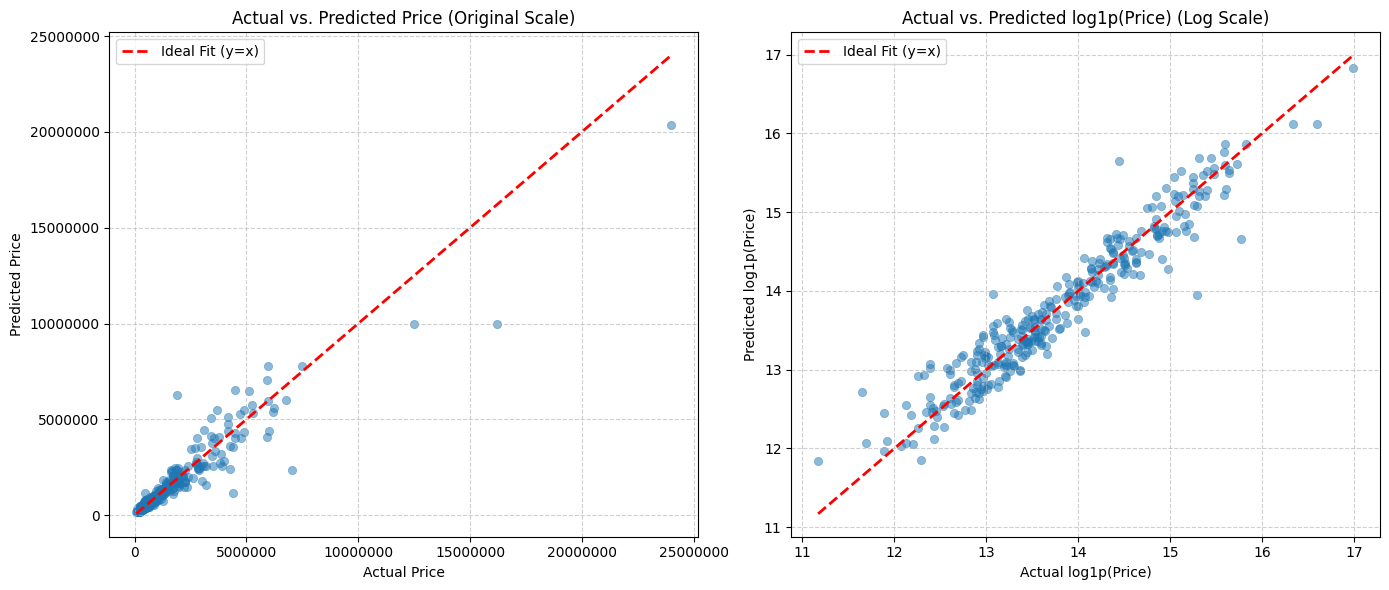

In [37]:
# --- Assuming these variables are available from the previous model execution ---
# y_test: The actual log1p_Price values from the test set
# y_pred_log: The model's predictions on the log1p_Price scale for the test set
# y_test_actual: The actual Price values (reconstructed via np.expm1(y_test))
# y_pred_actual: The predicted Price values (reconstructed via np.expm1(y_pred_log))
# -----------------------------------------------------------------------------

# --- Validation (Optional but good practice) ---
required_vars = ['y_test', 'y_pred_log', 'y_test_actual', 'y_pred_actual']
if not all(var in locals() or var in globals() for var in required_vars):
     print("Error: Not all required variables (y_test, y_pred_log, y_test_actual, y_pred_actual) are available.")
     print("Please ensure the model training and prediction script has been run successfully.")
     # Optionally, raise an error here
else:
    print("Required variables found. Generating Actual vs. Predicted plots...")

    # --- Create the Plots ---
    plt.figure(figsize=(14, 6)) # Adjusted figure size for two plots

    # Plot 1: Actual Price vs Predicted Price (Original Scale)
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.5, edgecolor=None)
    # Add the ideal prediction line (y=x)
    min_val = min(y_test_actual.min(), y_pred_actual.min())
    max_val = max(y_test_actual.max(), y_pred_actual.max())
    plt.plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2, label='Ideal Fit (y=x)')
    plt.title('Actual vs. Predicted Price (Original Scale)')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.ticklabel_format(style='plain', axis='both') # Avoid scientific notation
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    # Plot 2: Actual log1p(Price) vs Predicted log1p(Price) (Log Scale)
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_test, y=y_pred_log, alpha=0.5, edgecolor=None)
    # Add the ideal prediction line (y=x)
    min_val_log = min(y_test.min(), y_pred_log.min())
    max_val_log = max(y_test.max(), y_pred_log.max())
    plt.plot([min_val_log, max_val_log], [min_val_log, max_val_log], '--r', linewidth=2, label='Ideal Fit (y=x)')
    plt.title('Actual vs. Predicted log1p(Price) (Log Scale)')
    plt.xlabel('Actual log1p(Price)')
    plt.ylabel('Predicted log1p(Price)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()


    # Adjust layout and show
    plt.tight_layout()
    plt.show()

# 4. Ensemble Learning

# 5. Visualization and Comparisons